# Import modules

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Preprocessing the data

In [2]:
BUFFER_SIZE = 70_000
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [4]:
mnist_train, mnist_test =mnist_dataset['train'], mnist_dataset['test']

In [5]:
def scale (image,label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    
    return image, label

train_and_validation_data = mnist_train.map(scale)
test_data =mnist_test.map(scale)

In [6]:
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [7]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [8]:
train_and_validation_data = train_and_validation_data.shuffle(BUFFER_SIZE)

In [9]:
train_data = train_and_validation_data.skip(num_validation_samples)
validation_data = train_and_validation_data.take(num_validation_samples)

In [10]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

# Creating model

In [11]:
clf = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 5, activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 50)        1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 50)        22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1250)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12510     
Total params: 36,360
Trainable params: 36,360
Non-trainable params: 0
____________________________________________________

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
clf.compile(optimizer='adam', loss = loss_fn, metrics=['accuracy'])

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 2,
    verbose = 0,
    restore_best_weights=True
)

In [15]:
clf.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data=validation_data,
    verbose = 2
)

Epoch 1/20
422/422 - 22s - loss: 0.2743 - accuracy: 0.9213 - val_loss: 0.0741 - val_accuracy: 0.9765
Epoch 2/20
422/422 - 17s - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 3/20
422/422 - 13s - loss: 0.0547 - accuracy: 0.9838 - val_loss: 0.0488 - val_accuracy: 0.9862
Epoch 4/20
422/422 - 13s - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 5/20
422/422 - 13s - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0276 - val_accuracy: 0.9918
Epoch 6/20
422/422 - 13s - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0236 - val_accuracy: 0.9933
Epoch 7/20
422/422 - 13s - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0248 - val_accuracy: 0.9937
Epoch 8/20
422/422 - 13s - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0212 - val_accuracy: 0.9938
Epoch 9/20
422/422 - 13s - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0204 - val_accuracy: 0.9937
Epoch 10/20
422/422 - 13s - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0126 - val_accura

# Testing the model

In [38]:
test_loss, test_accuracy = clf.evaluate(test_data)
print('Test loss: {0:.5f} \nTest accuracy: {1:.5f}'.format(test_loss, test_accuracy))

1/1 [==============================] - 1s 533ms/step - loss: 0.0327 - accuracy: 0.9905
Test loss: 0.03266 
Test accuracy: 0.99050


In [42]:
import matplotlib.pyplot as plt
import numpy as np
for img, lbl in test_data.take(1):
    img_test = img.numpy()
    lbl_test = lbl.numpy()
#print(img_test.shape)
img_plot = np.reshape(img_test, (10000, 28, 28))

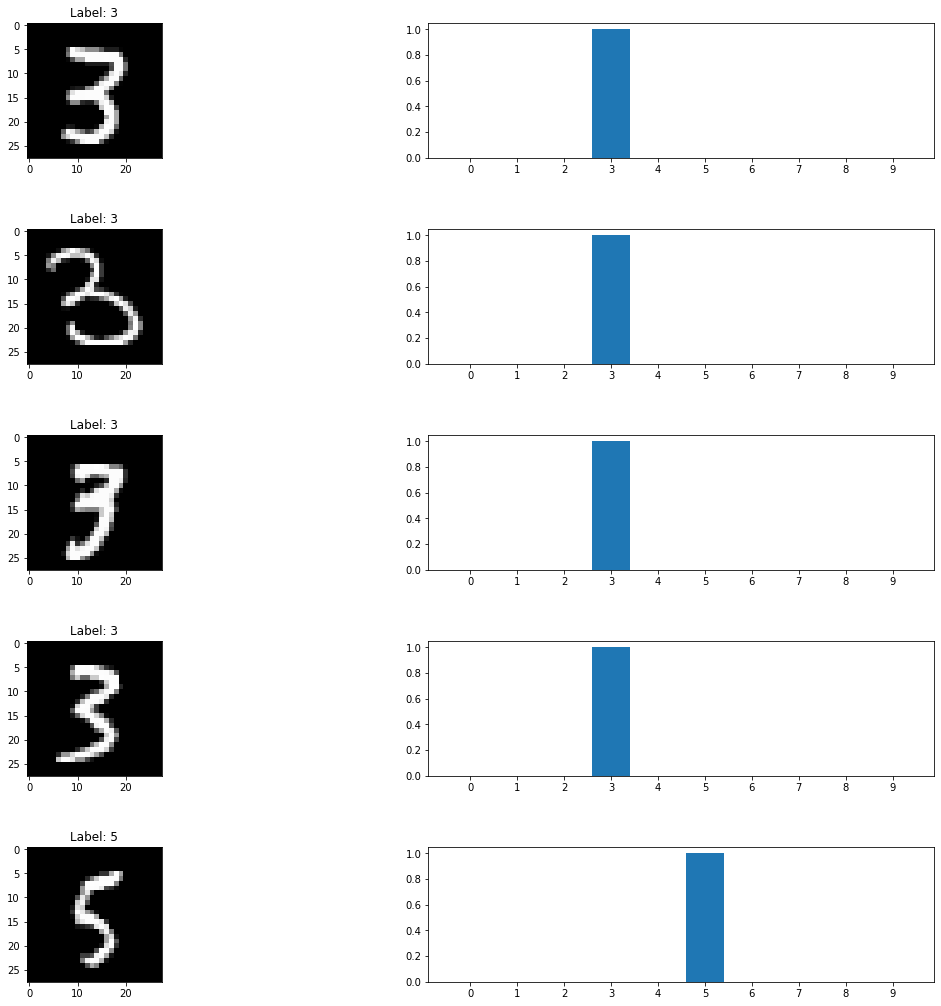

<Figure size 720x432 with 0 Axes>

In [72]:
import random

randomlist = random.sample(range(1, 10000), 5)
fig, axs = plt.subplots(5, 2, figsize=(17, 15))
fig.tight_layout(pad=5.0)
plt.figure(figsize=(10,6))
j = 0
for i in randomlist:

    axs[j,0].set_title("Label: {}".format(lbl_test[i-1]))
    axs[j,0].imshow(img_plot[i-1], cmap="gray")
    
    
    pred_img = clf.predict(img_test[i-1:i])
    prob = tf.nn.softmax(pred_img).numpy()
   
    axs[j,1].bar(x=[1,2,3,4,5,6,7,8,9,10], height=prob[0], tick_label=["0","1","2","3","4","5","6","7","8","9"])
    j=j+1
